<a href="https://colab.research.google.com/github/anikdem01/pneumonia_detection/blob/main/image_classifier_pneumonia_normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Import dependencies

In [ ]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
### Load and scale data

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data')
data = data.map(lambda x, y: (x/255, y))
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 5840 files belonging to 2 classes.


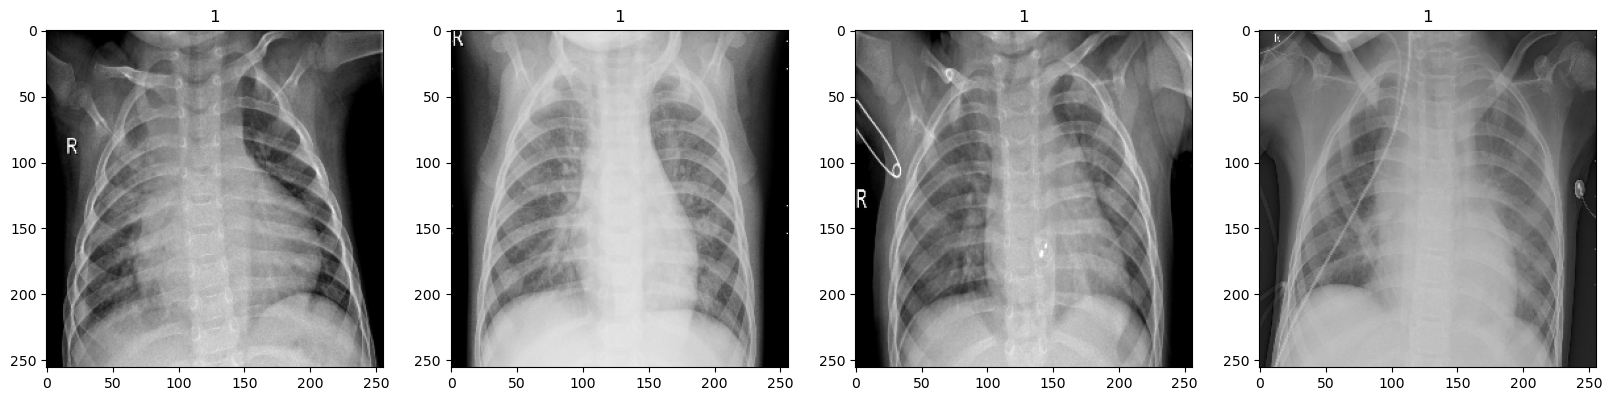

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
# 0 = normal, 1 = pneumonia

In [ ]:
### Split data batches into training, evaluation, testing

In [ ]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)-train_size-val_size)
print(train_size, val_size, test_size, "=>", train_size+val_size+test_size)

128 36 19 => 183


In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
### Build model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
### Train

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 40s 304ms/step - accuracy: 0.8071 - loss: 0.4618 - val_accuracy: 0.9245 - val_loss: 0.2005
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 39s 303ms/step - accuracy: 0.9389 - loss: 0.1601 - val_accuracy: 0.9453 - val_loss: 0.1496
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 40s 309ms/step - accuracy: 0.9541 - loss: 0.1209 - val_accuracy: 0.8793 - val_loss: 0.3686
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.9463 - loss: 0.1367 - val_accuracy: 0.9427 - val_loss: 0.1724
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 39s 303ms/step - accuracy: 0.9643 - loss: 0.0917 - val_accuracy: 0.9453 - val_loss: 0.1428
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 40s 309ms/step - accuracy: 0.9742 - loss: 0.0715 - val_accuracy: 0.9470 - val_loss: 0.1506
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 42s 325ms/step - accuracy: 0.9816 - loss: 0.0528 - val_accuracy: 0.9358 - val_loss: 0.1808
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 42s 323ms/step - accuracy: 0.9802 - loss: 0.0

In [ ]:
### Plot performance

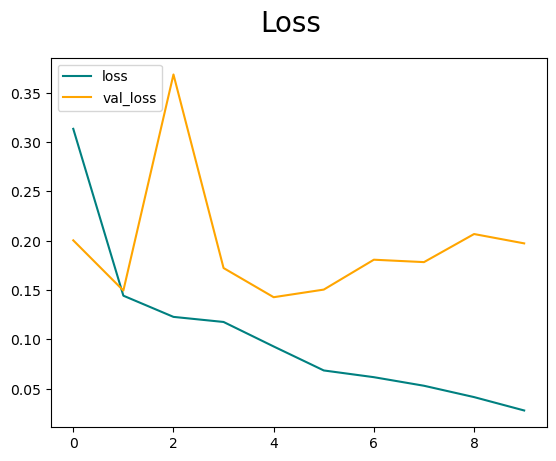

In [ ]:
# Loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

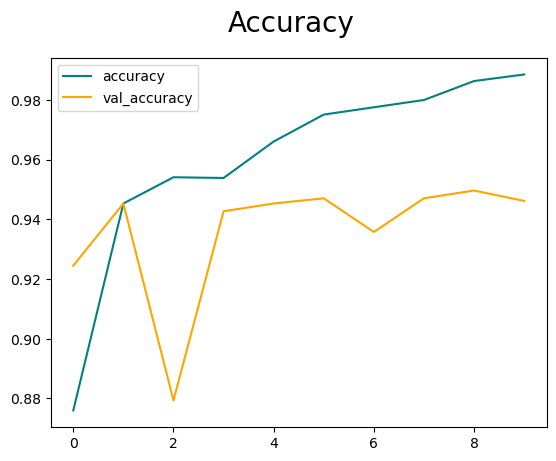

In [ ]:
# Accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print('Precision', pre.result().numpy())
print('Recall', re.result().numpy())
print('Accuracy', acc.result().numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Precision 0.95604396
Recall 0.99088836
Accuracy 0.9594595


2024-10-06 16:04:13.528254: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
### Test manualy

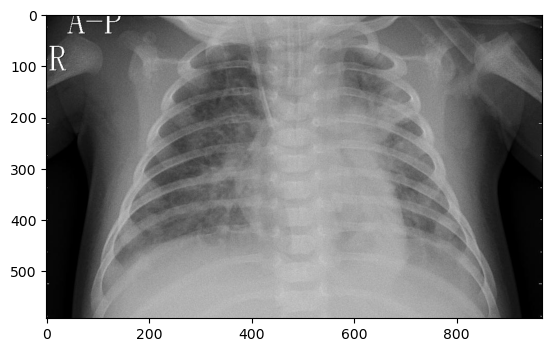

In [ ]:
import cv2

# make name here
name = 'pneum2.jpeg'

# import the image to img and resize
img = cv2.imread(name)
resize = tf.image.resize(img, (256, 256))

# show img
plt.imshow(img)
plt.show()

In [ ]:
print(resize.shape)
np.expand_dims(resize, 0)
resize = resize/255
print(resize.shape)

(256, 256, 3)
(256, 256, 3)


In [ ]:
yhat = model.predict(np.expand_dims(resize, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
# model prediction value 0 is normal, 1 is pneum
print(yhat)
if yhat > 0.5:
    print('prob pneum')
else:
    print('prob normal')

[[0.9999979]]
prob pneum
